In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
os.getcwd()

'c:\\Users\\LENOVO\\OneDrive\\Python\\Proyectos\\GitHub\\Face Recognition with Tensorflow and Keras'

### Cargar modelo VGG16

In [10]:
model_vgg16 = load_model('./Models/model_vgg16.h5')

In [11]:
model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### Prueba vgg16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


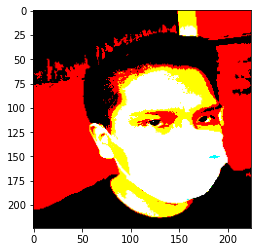

In [12]:
imagen_prueba = cv2.imread('brayan_prueba.jpg');
imagen_prueba = tf.keras.applications.vgg16.preprocess_input(imagen_prueba)
imagen_prueba = cv2.resize(imagen_prueba, (224, 224))

plt.imshow(imagen_prueba)

In [13]:
imagen_prediction = model_vgg16.predict(x=np.array([imagen_prueba]), verbose=0);
imagen_prediction


array([[0.01162198, 0.97848755, 0.00989039]], dtype=float32)

In [15]:
faceClassif = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture("./video_cesar.mp4")

contador = 0;
result = ''
while (cap.isOpened()):
   ret, frame = cap.read()
   frame = cv2.resize(frame, (1366, 768))    
   
   roi_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)   
   gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   scaleFactor = 1.25
   minNeighbors = 5

   faces = faceClassif.detectMultiScale(gray, scaleFactor, minNeighbors)
   for (i, (x, y, w, h)) in enumerate(faces):    
    
       #Construir mi marco de interes
       original = roi_frame[y:y+h,x:x+w]
       roi =  roi_frame[y-140:y+h+70,x-70:x+w+70]
         
       try:
           if w >= 224 and h >= 224:
               #Contador de frames (solo funciona para una persona)
               if contador % 40 == 0:
                   imagen_roi = tf.keras.applications.vgg16.preprocess_input(roi)
                   imagen_roi = cv2.resize(imagen_roi, (224, 224))
                   imagen_predict = np.array([imagen_roi]);
                   prediction = model_vgg16.predict(x=imagen_predict, verbose=0);
                   print(prediction)
                   persona = np.argmax(prediction, axis=-1)[0];    
                   probabilidad_persona = prediction[0][persona];
                   print(probabilidad_persona)
                   if persona == 0 and probabilidad_persona >= 0.6:
                     result = "Cesar"
                   elif persona == 1 and probabilidad_persona >= 0.6:
                     result = "Brayan" 
                   elif persona == 2 and probabilidad_persona >= 0.6:
                     result = "Ronald" 
                   elif persona == 3 and probabilidad_persona >= 0.6:
                     result = "Eduardo" 
                   else:
                    result = "Desconocido"

               #Impresion sin variables locals         
               cv2.putText(frame, f'{result}', (x, y-50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 239), 5, cv2.FILLED)
               cv2.putText(frame, f'{round(probabilidad_persona * 100, 2)}%', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 239), 5, cv2.FILLED)
               cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 255), 2)
       except Exception as e:
           print('')     
      
            
   
   cv2.putText(frame, "Salir de la aplicacion: Tecla s", (825, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.FILLED)
   cv2.imshow('frame', frame)
   
   if cv2.waitKey(1) & 0xFF == ord('s'):
      break
   contador+=1
cap.release()
cv2.destroyAllWindows()

[[0.9928186  0.00457413 0.00260733]]
0.9928186
[[9.9972123e-01 2.4541334e-05 2.5415208e-04]]
0.9997212
